In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Ignore the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [3]:
# Importing various modules for data visualisation and manipulation
import numpy as np
import pandas as pd 
from csv import reader
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from matplotlib import style
import seaborn as sns
import glob
import collections
import networkx as nx
import gc
from collections import Counter
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
# Preamble 
# import sherlockml.filesystem as sfs
import random
from tkinter import _flatten

In [5]:
label = pd.read_csv('./user1.csv')
label

,Unnamed: 0,user_id,age_range,gender,merchant_id,label,activity_log,log_num,num
0,0,34176,6.0,0.0,944,-1,408895:1505:7370:1107:0,0,1
1,1,34176,6.0,0.0,412,-1,17235:1604:4396:0818:0#954723:1604:4396:0818:0...,7,8
2,2,34176,6.0,0.0,1945,-1,231901:662:2758:0818:0#231901:662:2758:0818:0#...,6,7
3,3,34176,6.0,0.0,4752,-1,174142:821:6938:1027:0,0,1
4,4,34176,6.0,0.0,643,-1,716371:1505:968:1024:3,0,1
...,...,...,...,...,...,...,...,...,...
7030718,7030718,229247,4.0,2.0,2000,-1,610483:737:3894:0516:2#610483:737:3894:0524:0,1,2
7030719,7030719,229247,4.0,2.0,579,-1,179514:420:3610:1014:0#1007071:420:3610:1014:0...,2,3
7030720,7030720,229247,4.0,2.0,1860,-1,980351:1130:918:1016:3#153613:1130:918:1016:0#...,2,3
7030721,7030721,229247,4.0,2.0,4140,0,308321:737:5697:1111:0#308321:737:5697:1111:0#...,23,24


In [6]:
df0 = label.iloc[:,1:6]
df0['id']  = df0['user_id'].map(str) + '_' + df0['merchant_id'].map(str)
df0.head()

,user_id,age_range,gender,merchant_id,label,id
0,34176,6.0,0.0,944,-1,34176_944
1,34176,6.0,0.0,412,-1,34176_412
2,34176,6.0,0.0,1945,-1,34176_1945
3,34176,6.0,0.0,4752,-1,34176_4752
4,34176,6.0,0.0,643,-1,34176_643


In [7]:
result = pd.read_csv('./data/train_format1.csv')
result['id'] = result['user_id'].map(str) + '_'  + result['merchant_id'].map(str)
result = pd.DataFrame(result['id'])
result.head()

,id
0,34176_3906
1,34176_121
2,34176_4356
3,34176_2217
4,230784_4818


In [8]:
df = result.merge(df0, on = 'id', how = 'left')
df

,id,user_id,age_range,gender,merchant_id,label
0,34176_3906,34176,6.0,0.0,3906,0
1,34176_121,34176,6.0,0.0,121,0
2,34176_4356,34176,6.0,0.0,4356,1
3,34176_2217,34176,6.0,0.0,2217,0
4,230784_4818,230784,0.0,0.0,4818,0
...,...,...,...,...,...,...
260859,359807_4325,359807,4.0,1.0,4325,0
260860,294527_3971,294527,0.0,1.0,3971,0
260861,294527_152,294527,0.0,1.0,152,0
260862,294527_2537,294527,0.0,1.0,2537,0


In [9]:
del label
del result
gc.collect()

45

In [10]:
data = pd.read_csv('./part2.csv')
del data['Unnamed: 0']
# user = all_user[train_user['label'] != -1]
data.head()

,user_id,item_id,cat_id,merchant_id,brand_id,time_stamp,action_type,id,month,date,age_range,gender
0,328862,323294,833,2882,2661.0,829,0,328862_2882,8,29,6.0,1.0
1,328862,844400,1271,2882,2661.0,829,0,328862_2882,8,29,6.0,1.0
2,328862,575153,1271,2882,2661.0,829,0,328862_2882,8,29,6.0,1.0
3,328862,996875,1271,2882,2661.0,829,0,328862_2882,8,29,6.0,1.0
4,328862,1086186,1271,1253,1049.0,829,0,328862_1253,8,29,6.0,1.0


In [11]:
data['user_seg'] = data['gender'].map(str) +'-'+data['age_range'].map(str)
data

,user_id,item_id,cat_id,merchant_id,brand_id,time_stamp,action_type,id,month,date,age_range,gender,user_seg
0,328862,323294,833,2882,2661.0,829,0,328862_2882,8,29,6.0,1.0,1.0-6.0
1,328862,844400,1271,2882,2661.0,829,0,328862_2882,8,29,6.0,1.0,1.0-6.0
2,328862,575153,1271,2882,2661.0,829,0,328862_2882,8,29,6.0,1.0,1.0-6.0
3,328862,996875,1271,2882,2661.0,829,0,328862_2882,8,29,6.0,1.0,1.0-6.0
4,328862,1086186,1271,1253,1049.0,829,0,328862_1253,8,29,6.0,1.0,1.0-6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54925325,208016,107662,898,1346,7995.0,1110,0,208016_1346,11,10,3.0,2.0,2.0-3.0
54925326,208016,1058313,898,1346,7995.0,1110,0,208016_1346,11,10,3.0,2.0,2.0-3.0
54925327,208016,449814,898,983,7995.0,1110,0,208016_983,11,10,3.0,2.0,2.0-3.0
54925328,208016,634856,898,1346,7995.0,1110,0,208016_1346,11,10,3.0,2.0,2.0-3.0


In [12]:
data['purchase'] = data.action_type.apply(lambda x: 1 if x ==2 else 0)
purchase_df = data[data['purchase'] == 1]
purchase_df

,user_id,item_id,cat_id,merchant_id,brand_id,time_stamp,action_type,id,month,date,age_range,gender,user_seg,purchase
19,328862,81766,614,4605,7622.0,709,2,328862_4605,7,9,6.0,1.0,1.0-6.0,1
23,328862,853901,267,3073,8126.0,805,2,328862_3073,8,5,6.0,1.0,1.0-6.0,1
24,328862,1102596,267,3073,8126.0,805,2,328862_3073,8,5,6.0,1.0,1.0-6.0,1
25,328862,963870,267,3073,8126.0,805,2,328862_3073,8,5,6.0,1.0,1.0-6.0,1
26,328862,813647,267,3073,8126.0,805,2,328862_3073,8,5,6.0,1.0,1.0-6.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54925253,128038,1022583,883,2031,2446.0,1111,2,128038_2031,11,11,2.0,0.0,0.0-2.0,1
54925254,128038,1083994,748,2002,3940.0,1111,2,128038_2002,11,11,2.0,0.0,0.0-2.0,1
54925273,34885,490526,1620,3444,5308.0,1111,2,34885_3444,11,11,0.0,1.0,1.0-0.0,1
54925276,208016,51712,898,3763,8434.0,1111,2,208016_3763,11,11,3.0,2.0,2.0-3.0,1


In [13]:
normal_df = data[data['time_stamp'] < 1011]
normal_df

,user_id,item_id,cat_id,merchant_id,brand_id,time_stamp,action_type,id,month,date,age_range,gender,user_seg,purchase
0,328862,323294,833,2882,2661.0,829,0,328862_2882,8,29,6.0,1.0,1.0-6.0,0
1,328862,844400,1271,2882,2661.0,829,0,328862_2882,8,29,6.0,1.0,1.0-6.0,0
2,328862,575153,1271,2882,2661.0,829,0,328862_2882,8,29,6.0,1.0,1.0-6.0,0
3,328862,996875,1271,2882,2661.0,829,0,328862_2882,8,29,6.0,1.0,1.0-6.0,0
4,328862,1086186,1271,1253,1049.0,829,0,328862_1253,8,29,6.0,1.0,1.0-6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54895003,61944,961586,800,4303,4345.0,1010,0,61944_4303,10,10,0.0,0.0,0.0-0.0,0
54895004,61944,961586,800,4303,4345.0,1010,0,61944_4303,10,10,0.0,0.0,0.0-0.0,0
54895024,61944,359584,229,4303,4345.0,1010,0,61944_4303,10,10,0.0,0.0,0.0-0.0,0
54895098,287626,512052,267,3078,2276.0,1010,0,287626_3078,10,10,2.0,0.0,0.0-2.0,0


In [14]:
npurchase_df = normal_df[normal_df['purchase'] == 1]
npurchase_df

,user_id,item_id,cat_id,merchant_id,brand_id,time_stamp,action_type,id,month,date,age_range,gender,user_seg,purchase
19,328862,81766,614,4605,7622.0,709,2,328862_4605,7,9,6.0,1.0,1.0-6.0,1
23,328862,853901,267,3073,8126.0,805,2,328862_3073,8,5,6.0,1.0,1.0-6.0,1
24,328862,1102596,267,3073,8126.0,805,2,328862_3073,8,5,6.0,1.0,1.0-6.0,1
25,328862,963870,267,3073,8126.0,805,2,328862_3073,8,5,6.0,1.0,1.0-6.0,1
26,328862,813647,267,3073,8126.0,805,2,328862_3073,8,5,6.0,1.0,1.0-6.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54894428,151901,1005067,1668,4077,6762.0,1010,2,151901_4077,10,10,0.0,1.0,1.0-0.0,1
54894614,267382,592793,1034,4552,4653.0,1010,2,267382_4552,10,10,0.0,0.0,0.0-0.0,1
54894924,386602,273190,819,2566,4223.0,1010,2,386602_2566,10,10,0.0,1.0,1.0-0.0,1
54894926,386602,993818,1189,2566,821.0,1010,2,386602_2566,10,10,0.0,1.0,1.0-0.0,1


## User

In [15]:
user = pd.DataFrame(data.groupby('user_id').time_stamp.count())
user.columns = ['frequency']
user

,frequency
user_id,
1,33
2,63
3,68
4,50
5,173
...,...
424166,90
424167,35
424168,223


In [16]:
user_monetary = pd.DataFrame(data.groupby('user_id').purchase.sum())
user['monetary'] = user_monetary['purchase']
# in this case, order value is not given, therefore, the purchase times of a user is considered to be the monetary value of a client.
user

,frequency,monetary
user_id,,
1,33,6
2,63,14
3,68,4
4,50,1
5,173,13
...,...,...
424166,90,11
424167,35,6
424168,223,6


In [17]:
def recency(data):
    time = set(data)
    if len(time) > 1:
        return sorted(time)[-2]
    else:
        return sorted(time)[0]

In [18]:
purchase_user = purchase_df.groupby('user_id')
# purchase_user.size()
user_recency = pd.DataFrame(purchase_user.aggregate({'time_stamp':recency}))
user_recency 

,time_stamp
user_id,
1,1021
2,1010
3,819
4,1111
5,1029
...,...
424166,1109
424167,1108
424168,1103


In [19]:
def time_diff(month,date):
    t = 0
    if month == 11:
        t = 12 - date
    else:
        t += (10 - month) * 30
        t += (30 - date) + 12
    return t

In [20]:
user_recency['month'] = user_recency['time_stamp'].apply(lambda x: int(str(x)[:-2]))
user_recency['date'] = user_recency['time_stamp'].apply(lambda x: int(str(x)[-2:]))
user_recency['recency'] = user_recency.apply(lambda x:time_diff(x.month,x.date),axis = 1)
user['recency'] = user_recency['recency']
user

,frequency,monetary,recency
user_id,,,
1,33,6,21
2,63,14,32
3,68,4,83
4,50,1,1
5,173,13,13
...,...,...,...
424166,90,11,3
424167,35,6,4
424168,223,6,9


In [21]:
user_loyal = pd.DataFrame(df.groupby('user_id').label.sum())
user['repur_mers'] = user_loyal['label']
user

,frequency,monetary,recency,repur_mers
user_id,,,,
1,33,6,21,1.0
2,63,14,32,NaN
3,68,4,83,NaN
4,50,1,1,0.0
5,173,13,13,NaN
...,...,...,...,...
424166,90,11,3,NaN
424167,35,6,4,0.0
424168,223,6,9,NaN


In [22]:
user.replace(np.nan,0, inplace = True)
user

,frequency,monetary,recency,repur_mers
user_id,,,,
1,33,6,21,1.0
2,63,14,32,0.0
3,68,4,83,0.0
4,50,1,1,0.0
5,173,13,13,0.0
...,...,...,...,...
424166,90,11,3,0.0
424167,35,6,4,0.0
424168,223,6,9,0.0


In [23]:
RFM_df = user[['frequency','monetary','recency','repur_mers']]
RFM_df.sort_values(by = 'repur_mers', ascending = False)

,frequency,monetary,recency,repur_mers
user_id,,,,
340332,558,17,38,3.0
108299,107,10,33,3.0
257851,695,43,40,3.0
277998,167,13,1,3.0
274783,166,22,71,3.0
...,...,...,...,...
144088,243,10,136,0.0
144087,151,5,27,0.0
144086,19,2,1,0.0


In [24]:
avg_fre = RFM_df.frequency.mean()
RFM_df['fre'] = RFM_df['frequency'].apply(lambda x: 1 if x > avg_fre else 0)

In [25]:
avg_mon = RFM_df.monetary.mean()
RFM_df['mon'] = RFM_df['monetary'].apply(lambda x: 1 if x > avg_mon else 0)

In [26]:
avg_rec = RFM_df.recency.mean()
RFM_df['rec'] = RFM_df['recency'].apply(lambda x: 1 if x < avg_rec else 0)

In [27]:
def seg(fre,mon,rec):
    if rec == 0 and fre == mon == 1:
        return 'class 1'
    elif rec == fre == mon == 0:
        return 'class 2'
    elif rec == fre == mon == 1:
        return 'class 3'
    else:
        return 'class 4'

In [28]:
RFM_df['type'] = RFM_df.apply(lambda x: seg(x.fre, x.mon, x.rec),axis = 1)
RFM_df

,frequency,monetary,recency,repur_mers,fre,mon,rec,type
user_id,,,,,,,,
1,33,6,21,1.0,0,0,1,class 4
2,63,14,32,0.0,0,1,1,class 4
3,68,4,83,0.0,0,0,0,class 2
4,50,1,1,0.0,0,0,1,class 4
5,173,13,13,0.0,1,1,1,class 3
...,...,...,...,...,...,...,...,...
424166,90,11,3,0.0,0,1,1,class 4
424167,35,6,4,0.0,0,0,1,class 4
424168,223,6,9,0.0,1,0,1,class 4


In [29]:
frequency_df = RFM_df[['frequency','repur_mers']]
frequency_df = frequency_df.reset_index()
frequency_df.sort_values(by = 'frequency', ascending = False)

,user_id,frequency,repur_mers
254262,254263,14468,0.0
276886,276887,11856,0.0
109250,109251,9173,0.0
23105,23106,8370,0.0
179073,179074,8161,0.0
...,...,...,...
253838,253839,2,0.0
87113,87114,2,0.0
233784,233785,2,0.0
37812,37813,2,0.0


<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='frequency', ylabel='user_id'>

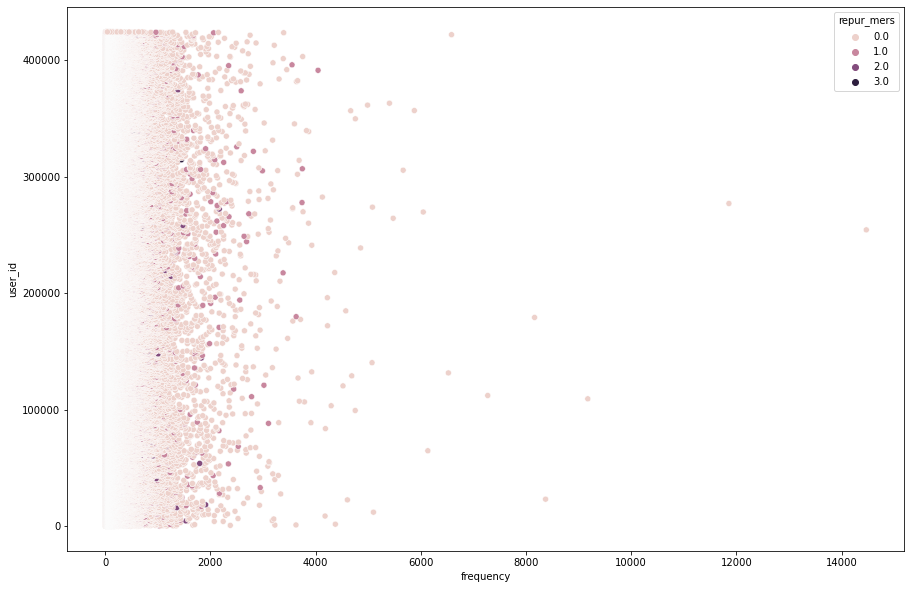

In [30]:
plt.figure(figsize=(15,10))
sns.scatterplot(frequency_df['frequency'],frequency_df['user_id'],hue=frequency_df['repur_mers'])
plt.show()

In [31]:
# outlier values detected
outlier_user_list1 = list(frequency_df.sort_values(by = 'frequency', ascending = False).iloc[:2,0].values)
outlier_user_list1

[254263, 276887]

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='frequency', ylabel='user_id'>

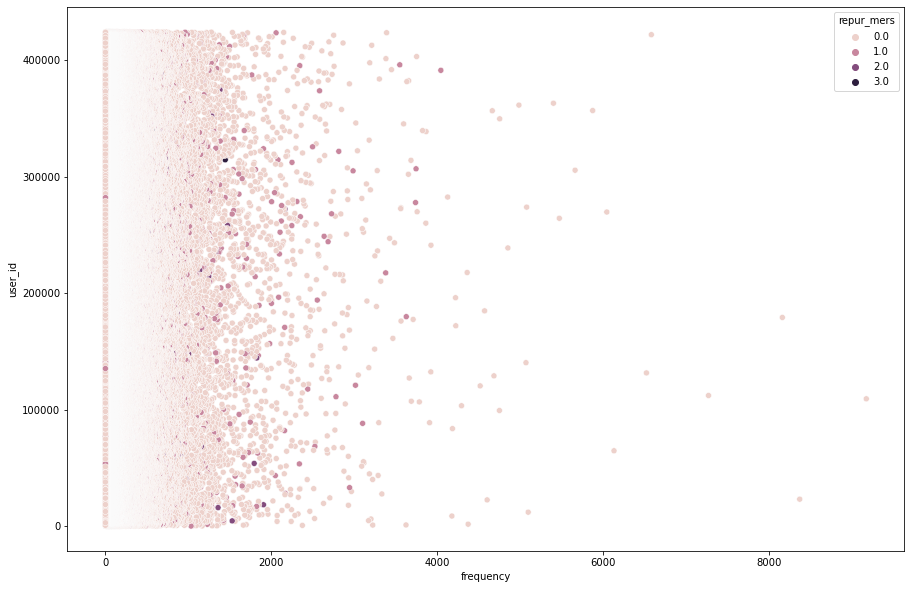

In [32]:
frequency_df1 = frequency_df.sort_values(by = 'frequency', ascending = False).iloc[2:,:]
plt.figure(figsize=(15,10))
sns.scatterplot(frequency_df1['frequency'],frequency_df1['user_id'],hue=frequency_df1['repur_mers'])
plt.show()

In [33]:
recency_df = RFM_df[['recency','repur_mers']]
recency_df = recency_df.reset_index()
recency_df.sort_values(by = 'recency', ascending = False)

,user_id,recency,repur_mers
208630,208631,181,0.0
387306,387307,181,1.0
419920,419921,181,0.0
317148,317149,181,0.0
118937,118938,181,0.0
...,...,...,...
84673,84674,1,0.0
84676,84677,1,0.0
232864,232865,1,0.0
331716,331717,1,0.0


<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='recency', ylabel='user_id'>

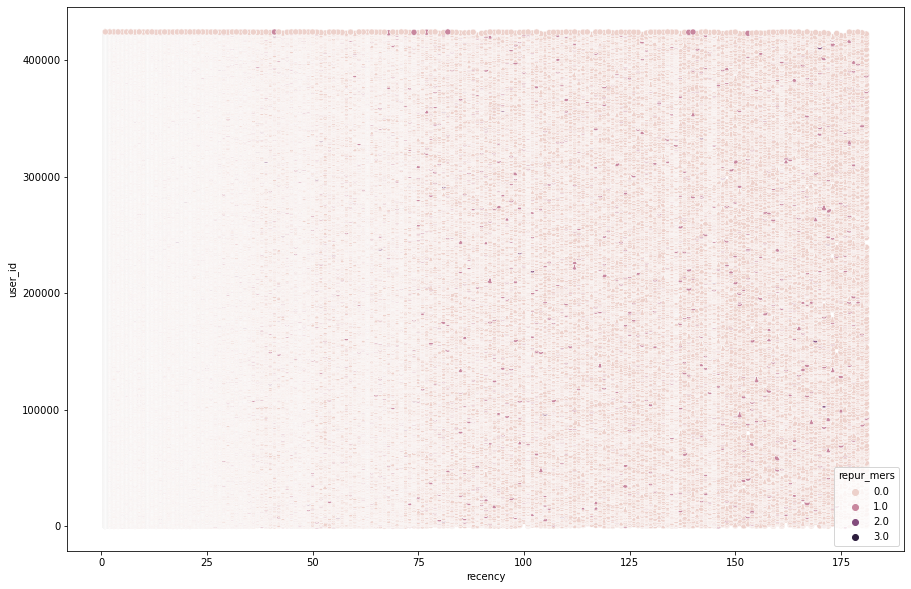

In [34]:
plt.figure(figsize=(15,10))
sns.scatterplot(recency_df['recency'],recency_df['user_id'],hue=recency_df['repur_mers'])
plt.show()

In [35]:
monetary_df = RFM_df[['monetary','repur_mers']]
monetary_df = monetary_df.reset_index()
monetary_df.sort_values('monetary', ascending = False)

,user_id,monetary,repur_mers
382315,382316,905,0.0
265989,265990,563,0.0
77456,77457,365,0.0
153822,153823,357,0.0
278594,278595,298,1.0
...,...,...,...
85872,85873,1,0.0
293840,293841,1,0.0
372334,372335,1,0.0
85839,85840,1,0.0


<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='monetary', ylabel='user_id'>

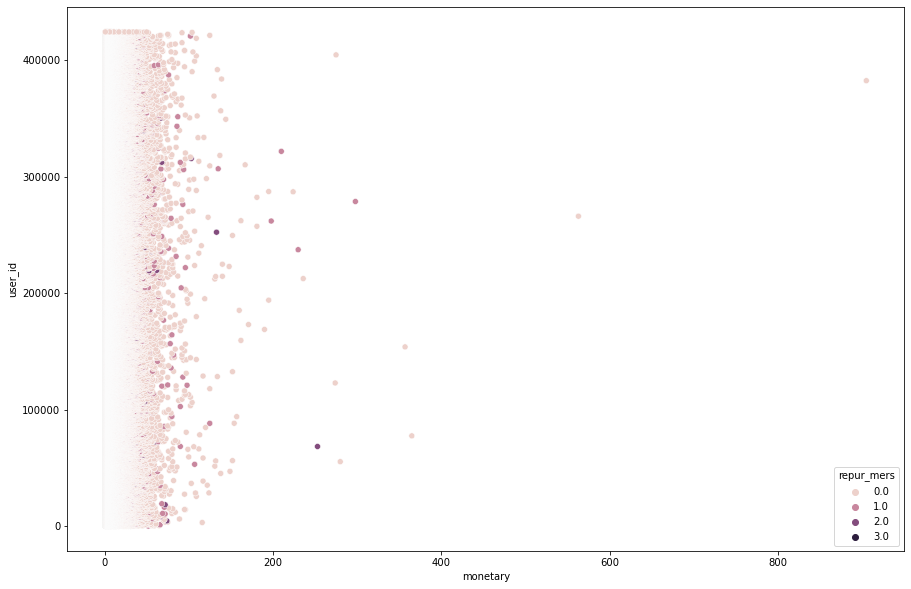

In [36]:
plt.figure(figsize=(15,10))
sns.scatterplot(monetary_df['monetary'],monetary_df['user_id'],hue=monetary_df['repur_mers'])
plt.show()

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='monetary', ylabel='user_id'>

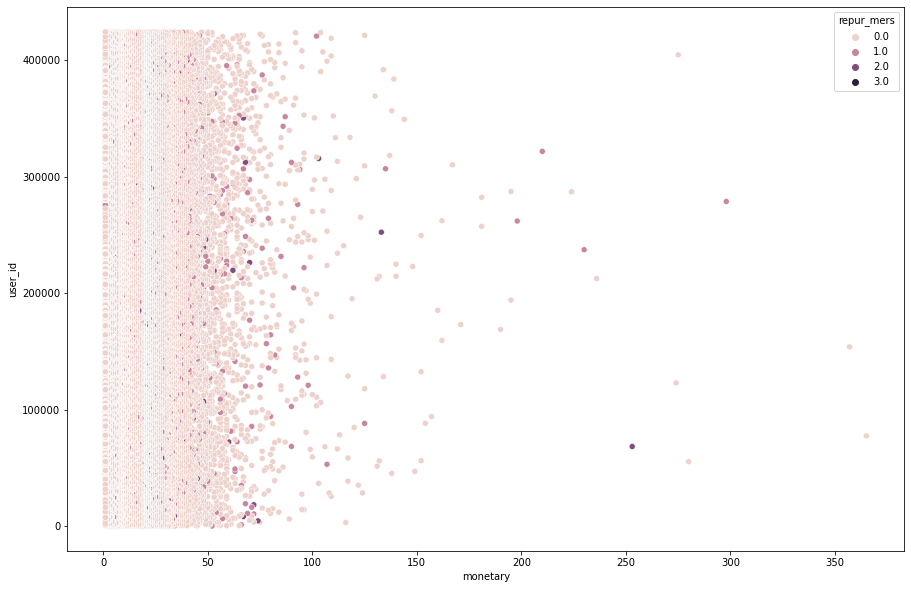

In [37]:
monetary_df1 = monetary_df.sort_values(by = 'monetary', ascending = False).iloc[2:,:]
plt.figure(figsize=(15,10))
sns.scatterplot(monetary_df1['monetary'],monetary_df1['user_id'],hue=monetary_df1['repur_mers'])
plt.show()

In [38]:
# outlier values detected
outlier_user_list2 = list(monetary_df.sort_values(by = 'monetary', ascending = False).iloc[:2,0].values)
outlier_user_list2

[382316, 265990]

In [39]:
len(set(data[(data['user_id'] == 382316)&(data['purchase'] == 1)].merchant_id))

414

In [40]:
len(set(data[(data['user_id'] == 265990)&(data['purchase'] == 1)].merchant_id))

312

In [41]:
m_user = data.groupby(['user_id','month']).id.count().unstack()
user[['May','June','July','Aug','Sep','Oct','Nov']] = m_user
user.replace(np.nan,0,inplace = True)
user

,frequency,monetary,recency,repur_mers,May,June,July,Aug,Sep,Oct,Nov
user_id,,,,,,,,,,,
1,33,6,21,1.0,0.0,0.0,0.0,0.0,0.0,16.0,17.0
2,63,14,32,0.0,2.0,26.0,1.0,20.0,0.0,5.0,9.0
3,68,4,83,0.0,2.0,3.0,1.0,3.0,22.0,5.0,32.0
4,50,1,1,0.0,12.0,0.0,12.0,0.0,7.0,3.0,16.0
5,173,13,13,0.0,16.0,21.0,3.0,37.0,12.0,52.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...
424166,90,11,3,0.0,7.0,0.0,0.0,6.0,29.0,4.0,44.0
424167,35,6,4,0.0,7.0,0.0,0.0,0.0,2.0,9.0,17.0
424168,223,6,9,0.0,9.0,5.0,36.0,37.0,46.0,40.0,50.0


In [42]:
user_action = data.groupby(['user_id','action_type']).item_id.count()
user_action = user_action.unstack()
user_action.replace(np.nan,0,inplace = True)
user[['click','cart','fav']] = user_action[[0,1,3]]
user['click_r'] = user['click'] / user['frequency']
user['cart_r'] = user['cart'] / user['frequency']
user['buy_r'] = user['monetary'] / user['frequency']
user

,frequency,monetary,recency,repur_mers,May,June,July,Aug,Sep,Oct,Nov,click,cart,fav,click_r,cart_r,buy_r
user_id,,,,,,,,,,,,,,,,,
1,33,6,21,1.0,0.0,0.0,0.0,0.0,0.0,16.0,17.0,27.0,0.0,0.0,0.818182,0.0,0.181818
2,63,14,32,0.0,2.0,26.0,1.0,20.0,0.0,5.0,9.0,47.0,0.0,2.0,0.746032,0.0,0.222222
3,68,4,83,0.0,2.0,3.0,1.0,3.0,22.0,5.0,32.0,63.0,0.0,1.0,0.926471,0.0,0.058824
4,50,1,1,0.0,12.0,0.0,12.0,0.0,7.0,3.0,16.0,49.0,0.0,0.0,0.980000,0.0,0.020000
5,173,13,13,0.0,16.0,21.0,3.0,37.0,12.0,52.0,32.0,150.0,0.0,10.0,0.867052,0.0,0.075145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424166,90,11,3,0.0,7.0,0.0,0.0,6.0,29.0,4.0,44.0,79.0,0.0,0.0,0.877778,0.0,0.122222
424167,35,6,4,0.0,7.0,0.0,0.0,0.0,2.0,9.0,17.0,28.0,0.0,1.0,0.800000,0.0,0.171429
424168,223,6,9,0.0,9.0,5.0,36.0,37.0,46.0,40.0,50.0,216.0,0.0,1.0,0.968610,0.0,0.026906


In [43]:
normal_action = normal_df.groupby(['user_id','action_type']).item_id.count()
normal_action = normal_action.unstack()
normal_action.replace(np.nan,0,inplace = True)
normal_action['naction_sum'] = normal_action.apply(lambda x: x.sum(),axis = 1)
user[['nclick','ncart','nbuy','nfav','naction_sum']] = normal_action
user['nclick_r'] = user['nclick'] / user['naction_sum']
user['ncart_r'] = user['ncart'] / user['naction_sum']
user['nbuy_r'] = user['nbuy'] / user['naction_sum']
del user['naction_sum']
gc.collect()

139

In [44]:
user

,frequency,monetary,recency,repur_mers,May,June,July,Aug,Sep,Oct,...,click_r,cart_r,buy_r,nclick,ncart,nbuy,nfav,nclick_r,ncart_r,nbuy_r
user_id,,,,,,,,,,,,,,,,,,,,,
1,33,6,21,1.0,0.0,0.0,0.0,0.0,0.0,16.0,...,0.818182,0.0,0.181818,5.0,0.0,0.0,0.0,1.000000,0.0,0.000000
2,63,14,32,0.0,2.0,26.0,1.0,20.0,0.0,5.0,...,0.746032,0.0,0.222222,45.0,0.0,7.0,0.0,0.865385,0.0,0.134615
3,68,4,83,0.0,2.0,3.0,1.0,3.0,22.0,5.0,...,0.926471,0.0,0.058824,28.0,0.0,3.0,0.0,0.903226,0.0,0.096774
4,50,1,1,0.0,12.0,0.0,12.0,0.0,7.0,3.0,...,0.980000,0.0,0.020000,31.0,0.0,0.0,0.0,1.000000,0.0,0.000000
5,173,13,13,0.0,16.0,21.0,3.0,37.0,12.0,52.0,...,0.867052,0.0,0.075145,79.0,0.0,6.0,6.0,0.868132,0.0,0.065934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424166,90,11,3,0.0,7.0,0.0,0.0,6.0,29.0,4.0,...,0.877778,0.0,0.122222,37.0,0.0,8.0,0.0,0.822222,0.0,0.177778
424167,35,6,4,0.0,7.0,0.0,0.0,0.0,2.0,9.0,...,0.800000,0.0,0.171429,8.0,0.0,1.0,0.0,0.888889,0.0,0.111111
424168,223,6,9,0.0,9.0,5.0,36.0,37.0,46.0,40.0,...,0.968610,0.0,0.026906,133.0,0.0,4.0,0.0,0.970803,0.0,0.029197


In [45]:
user_action['active_days'] = pd.DataFrame(data.groupby('user_id').time_stamp.nunique())
user_action['buy_days'] = pd.DataFrame(purchase_df.groupby('user_id').time_stamp.nunique())
user['days_ratio'] = user_action['buy_days']/user_action['active_days']
user

,frequency,monetary,recency,repur_mers,May,June,July,Aug,Sep,Oct,...,cart_r,buy_r,nclick,ncart,nbuy,nfav,nclick_r,ncart_r,nbuy_r,days_ratio
user_id,,,,,,,,,,,,,,,,,,,,,
1,33,6,21,1.0,0.0,0.0,0.0,0.0,0.0,16.0,...,0.0,0.181818,5.0,0.0,0.0,0.0,1.000000,0.0,0.000000,0.600000
2,63,14,32,0.0,2.0,26.0,1.0,20.0,0.0,5.0,...,0.0,0.222222,45.0,0.0,7.0,0.0,0.865385,0.0,0.134615,0.555556
3,68,4,83,0.0,2.0,3.0,1.0,3.0,22.0,5.0,...,0.0,0.058824,28.0,0.0,3.0,0.0,0.903226,0.0,0.096774,0.230769
4,50,1,1,0.0,12.0,0.0,12.0,0.0,7.0,3.0,...,0.0,0.020000,31.0,0.0,0.0,0.0,1.000000,0.0,0.000000,0.100000
5,173,13,13,0.0,16.0,21.0,3.0,37.0,12.0,52.0,...,0.0,0.075145,79.0,0.0,6.0,6.0,0.868132,0.0,0.065934,0.233333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424166,90,11,3,0.0,7.0,0.0,0.0,6.0,29.0,4.0,...,0.0,0.122222,37.0,0.0,8.0,0.0,0.822222,0.0,0.177778,0.666667
424167,35,6,4,0.0,7.0,0.0,0.0,0.0,2.0,9.0,...,0.0,0.171429,8.0,0.0,1.0,0.0,0.888889,0.0,0.111111,0.625000
424168,223,6,9,0.0,9.0,5.0,36.0,37.0,46.0,40.0,...,0.0,0.026906,133.0,0.0,4.0,0.0,0.970803,0.0,0.029197,0.072727


In [46]:
user_action['nactive_days'] = pd.DataFrame(normal_df.groupby('user_id').time_stamp.nunique())
user_action['nbuy_days'] = pd.DataFrame(npurchase_df.groupby('user_id').time_stamp.nunique())
user['ndays_ratio'] = user_action['nbuy_days']/user_action['nactive_days']
user.replace(np.nan,0,inplace = True)

In [47]:
u_item = pd.DataFrame(data.groupby(['user_id','item_id']).size().reset_index())
u_item.rename(columns = {0:'count'}, inplace = True)
u_item_info = u_item.groupby('user_id').aggregate({'count':[np.size,np.mean,np.max,np.min]}).reset_index()
u_item_info = u_item_info.set_index('user_id')
u_item_info.columns = ['ui_size', 'ui_mean', 'ui_max', 'ui_min']
user = user.merge(u_item_info, on = 'user_id', how = 'left')
user

,frequency,monetary,recency,repur_mers,May,June,July,Aug,Sep,Oct,...,nfav,nclick_r,ncart_r,nbuy_r,days_ratio,ndays_ratio,ui_size,ui_mean,ui_max,ui_min
user_id,,,,,,,,,,,,,,,,,,,,,
1,33,6,21,1.0,0.0,0.0,0.0,0.0,0.0,16.0,...,0.0,1.000000,0.0,0.000000,0.600000,0.000000,12,2.750000,14,1
2,63,14,32,0.0,2.0,26.0,1.0,20.0,0.0,5.0,...,0.0,0.865385,0.0,0.134615,0.555556,0.666667,43,1.465116,4,1
3,68,4,83,0.0,2.0,3.0,1.0,3.0,22.0,5.0,...,0.0,0.903226,0.0,0.096774,0.230769,0.222222,45,1.511111,6,1
4,50,1,1,0.0,12.0,0.0,12.0,0.0,7.0,3.0,...,0.0,1.000000,0.0,0.000000,0.100000,0.000000,28,1.785714,10,1
5,173,13,13,0.0,16.0,21.0,3.0,37.0,12.0,52.0,...,6.0,0.868132,0.0,0.065934,0.233333,0.181818,87,1.988506,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424166,90,11,3,0.0,7.0,0.0,0.0,6.0,29.0,4.0,...,0.0,0.822222,0.0,0.177778,0.666667,0.714286,48,1.875000,6,1
424167,35,6,4,0.0,7.0,0.0,0.0,0.0,2.0,9.0,...,0.0,0.888889,0.0,0.111111,0.625000,0.500000,15,2.333333,7,1
424168,223,6,9,0.0,9.0,5.0,36.0,37.0,46.0,40.0,...,0.0,0.970803,0.0,0.029197,0.072727,0.047619,160,1.393750,12,1


In [48]:
u_brand = pd.DataFrame(data.groupby(['user_id','brand_id']).size().reset_index())
u_brand.rename(columns = {0:'count'}, inplace = True)
u_brand_info = u_brand.groupby('user_id').aggregate({'count':[np.size,np.mean,np.max,np.min]}).reset_index()
u_brand_info = u_brand_info.set_index('user_id')
u_brand_info.columns = ['ub_size', 'ub_mean', 'ub_max', 'ub_min']
user = user.merge(u_brand_info, on = 'user_id', how = 'left')
user

,frequency,monetary,recency,repur_mers,May,June,July,Aug,Sep,Oct,...,days_ratio,ndays_ratio,ui_size,ui_mean,ui_max,ui_min,ub_size,ub_mean,ub_max,ub_min
user_id,,,,,,,,,,,,,,,,,,,,,
1,33,6,21,1.0,0.0,0.0,0.0,0.0,0.0,16.0,...,0.600000,0.000000,12,2.750000,14,1,9,3.666667,14,1
2,63,14,32,0.0,2.0,26.0,1.0,20.0,0.0,5.0,...,0.555556,0.666667,43,1.465116,4,1,15,4.200000,20,1
3,68,4,83,0.0,2.0,3.0,1.0,3.0,22.0,5.0,...,0.230769,0.222222,45,1.511111,6,1,22,3.090909,16,1
4,50,1,1,0.0,12.0,0.0,12.0,0.0,7.0,3.0,...,0.100000,0.000000,28,1.785714,10,1,12,4.166667,25,1
5,173,13,13,0.0,16.0,21.0,3.0,37.0,12.0,52.0,...,0.233333,0.181818,87,1.988506,11,1,59,2.932203,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424166,90,11,3,0.0,7.0,0.0,0.0,6.0,29.0,4.0,...,0.666667,0.714286,48,1.875000,6,1,23,3.913043,20,1
424167,35,6,4,0.0,7.0,0.0,0.0,0.0,2.0,9.0,...,0.625000,0.500000,15,2.333333,7,1,9,3.888889,11,1
424168,223,6,9,0.0,9.0,5.0,36.0,37.0,46.0,40.0,...,0.072727,0.047619,160,1.393750,12,1,97,2.298969,14,1


In [49]:
u_cat = pd.DataFrame(data.groupby(['user_id','cat_id']).size().reset_index())
u_cat.rename(columns = {0:'count'}, inplace = True)
u_cat_info = u_cat.groupby('user_id').aggregate({'count':[np.size,np.mean,np.max,np.min]}).reset_index()
u_cat_info = u_cat_info.set_index('user_id')
u_cat_info.columns = ['uc_size', 'uc_mean', 'uc_max', 'uc_min']
user = user.merge(u_cat_info, on = 'user_id', how = 'left')
user

,frequency,monetary,recency,repur_mers,May,June,July,Aug,Sep,Oct,...,ui_max,ui_min,ub_size,ub_mean,ub_max,ub_min,uc_size,uc_mean,uc_max,uc_min
user_id,,,,,,,,,,,,,,,,,,,,,
1,33,6,21,1.0,0.0,0.0,0.0,0.0,0.0,16.0,...,14,1,9,3.666667,14,1,6,5.500000,14,1
2,63,14,32,0.0,2.0,26.0,1.0,20.0,0.0,5.0,...,4,1,15,4.200000,20,1,14,4.500000,20,1
3,68,4,83,0.0,2.0,3.0,1.0,3.0,22.0,5.0,...,6,1,22,3.090909,16,1,19,3.578947,11,1
4,50,1,1,0.0,12.0,0.0,12.0,0.0,7.0,3.0,...,10,1,12,4.166667,25,1,13,3.846154,23,1
5,173,13,13,0.0,16.0,21.0,3.0,37.0,12.0,52.0,...,11,1,59,2.932203,18,1,40,4.325000,21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424166,90,11,3,0.0,7.0,0.0,0.0,6.0,29.0,4.0,...,6,1,23,3.913043,20,1,12,7.500000,24,1
424167,35,6,4,0.0,7.0,0.0,0.0,0.0,2.0,9.0,...,7,1,9,3.888889,11,1,9,3.888889,7,1
424168,223,6,9,0.0,9.0,5.0,36.0,37.0,46.0,40.0,...,12,1,97,2.298969,14,1,48,4.645833,39,1


<AxesSubplot:>

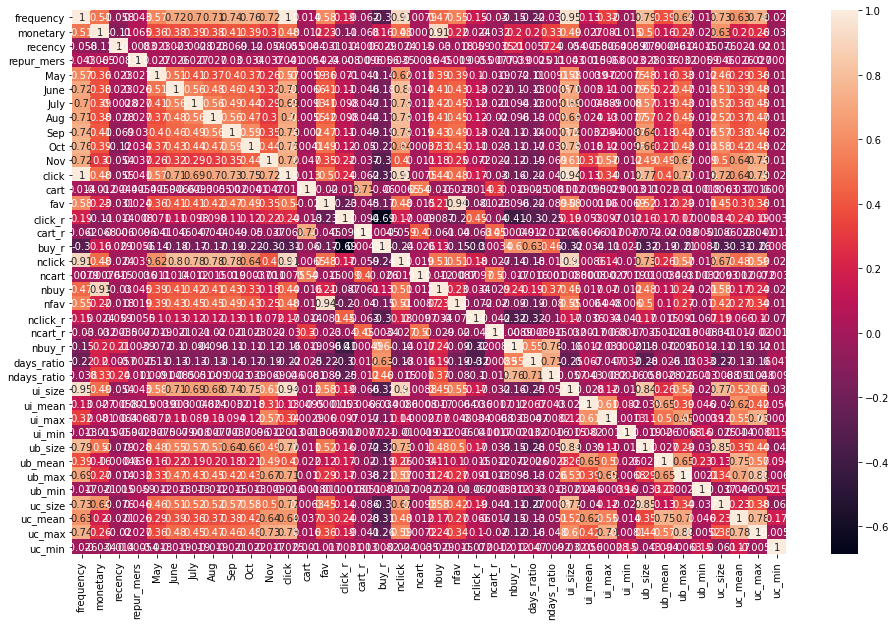

In [50]:
import seaborn as sns
figsize = (20,10)
f, ax = plt.subplots(figsize = (16, 10))
sns.heatmap(user.corr(), ax = ax,annot=True)

In [51]:
df_1 = df.merge(user,on = 'user_id',how = 'left')
df_1.replace(np.nan,0, inplace = True)
df_1 

,id,user_id,age_range,gender,merchant_id,label,frequency,monetary,recency,repur_mers,...,ui_max,ui_min,ub_size,ub_mean,ub_max,ub_min,uc_size,uc_mean,uc_max,uc_min
0,34176_3906,34176,6.0,0.0,3906,0,451,34,4,1.0,...,17,1,108,4.175926,70,1,45,10.022222,98,1
1,34176_121,34176,6.0,0.0,121,0,451,34,4,1.0,...,17,1,108,4.175926,70,1,45,10.022222,98,1
2,34176_4356,34176,6.0,0.0,4356,1,451,34,4,1.0,...,17,1,108,4.175926,70,1,45,10.022222,98,1
3,34176_2217,34176,6.0,0.0,2217,0,451,34,4,1.0,...,17,1,108,4.175926,70,1,45,10.022222,98,1
4,230784_4818,230784,0.0,0.0,4818,0,54,7,27,0.0,...,8,1,19,2.842105,10,1,17,3.176471,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260859,359807_4325,359807,4.0,1.0,4325,0,117,9,8,0.0,...,14,1,32,3.656250,25,1,25,4.680000,15,1
260860,294527_3971,294527,0.0,1.0,3971,0,198,5,47,0.0,...,13,1,37,5.351351,28,1,20,9.900000,38,1
260861,294527_152,294527,0.0,1.0,152,0,198,5,47,0.0,...,13,1,37,5.351351,28,1,20,9.900000,38,1
260862,294527_2537,294527,0.0,1.0,2537,0,198,5,47,0.0,...,13,1,37,5.351351,28,1,20,9.900000,38,1


In [52]:
## Done

## Merchant

In [53]:
# total action of each merchant
merchant = pd.DataFrame(data.groupby('merchant_id').action_type.count())
merchant.rename(columns = {'action_type':'action_num'}, inplace = True)
merchant

,action_num
merchant_id,
1,339140
2,2371
3,2645
4,3106
5,8192
...,...
4991,666
4992,13876
4993,14267


In [54]:
# total users of each merchant
m_user_num = pd.DataFrame(data.groupby('merchant_id').user_id.nunique())
merchant['user_num'] = m_user_num['user_id']
merchant

,action_num,user_num
merchant_id,,
1,339140,30796
2,2371,936
3,2645,1136
4,3106,1481
5,8192,3652
...,...,...
4991,666,227
4992,13876,2570
4993,14267,3986


In [55]:
action_num = pd.DataFrame(data.groupby(['merchant_id','action_type']).user_id.count())
action_num = action_num.unstack()
merchant[['m_click','m_cart','m_buy','m_fav']] = action_num
merchant['m_click_r'] = merchant['m_click'] / merchant['action_num']
merchant['m_cart_r'] = merchant['m_cart'] / merchant['action_num']
merchant['m_buy_r'] = merchant['m_buy'] / merchant['action_num']
merchant

,action_num,user_num,m_click,m_cart,m_buy,m_fav,m_click_r,m_cart_r,m_buy_r
merchant_id,,,,,,,,,
1,339140,30796,308236.0,444.0,17705.0,12755.0,0.908875,0.001309,0.052206
2,2371,936,2030.0,8.0,189.0,144.0,0.856179,0.003374,0.079713
3,2645,1136,2399.0,4.0,67.0,175.0,0.906994,0.001512,0.025331
4,3106,1481,2646.0,2.0,294.0,164.0,0.851900,0.000644,0.094656
5,8192,3652,7483.0,9.0,144.0,556.0,0.913452,0.001099,0.017578
...,...,...,...,...,...,...,...,...,...
4991,666,227,556.0,2.0,80.0,28.0,0.834835,0.003003,0.120120
4992,13876,2570,11380.0,20.0,1971.0,505.0,0.820121,0.001441,0.142044
4993,14267,3986,12324.0,18.0,769.0,1156.0,0.863812,0.001262,0.053901


In [56]:
m_month = pd.DataFrame(data.groupby(['merchant_id','month']).user_id.count())
m_month = m_month.unstack()
merchant[['May','June','July','Aug','Sep','Oct','Nov']] = m_month
merchant

,action_num,user_num,m_click,m_cart,m_buy,m_fav,m_click_r,m_cart_r,m_buy_r,May,June,July,Aug,Sep,Oct,Nov
merchant_id,,,,,,,,,,,,,,,,
1,339140,30796,308236.0,444.0,17705.0,12755.0,0.908875,0.001309,0.052206,28140.0,27652.0,27596.0,27675.0,39192.0,41806.0,147079.0
2,2371,936,2030.0,8.0,189.0,144.0,0.856179,0.003374,0.079713,99.0,166.0,102.0,191.0,363.0,353.0,1097.0
3,2645,1136,2399.0,4.0,67.0,175.0,0.906994,0.001512,0.025331,83.0,213.0,111.0,93.0,212.0,803.0,1130.0
4,3106,1481,2646.0,2.0,294.0,164.0,0.851900,0.000644,0.094656,95.0,281.0,598.0,522.0,544.0,713.0,353.0
5,8192,3652,7483.0,9.0,144.0,556.0,0.913452,0.001099,0.017578,534.0,928.0,768.0,702.0,795.0,1423.0,3042.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4991,666,227,556.0,2.0,80.0,28.0,0.834835,0.003003,0.120120,5.0,7.0,4.0,8.0,20.0,162.0,460.0
4992,13876,2570,11380.0,20.0,1971.0,505.0,0.820121,0.001441,0.142044,313.0,924.0,429.0,353.0,647.0,1878.0,9332.0
4993,14267,3986,12324.0,18.0,769.0,1156.0,0.863812,0.001262,0.053901,487.0,1431.0,2161.0,3081.0,1932.0,1670.0,3505.0


In [57]:
# total purchase users of a merchant
m_pur_times = pd.DataFrame(purchase_df.groupby(['merchant_id']).user_id.nunique())
merchant['puruser_num'] = m_pur_times['user_id']
merchant

,action_num,user_num,m_click,m_cart,m_buy,m_fav,m_click_r,m_cart_r,m_buy_r,May,June,July,Aug,Sep,Oct,Nov,puruser_num
merchant_id,,,,,,,,,,,,,,,,,
1,339140,30796,308236.0,444.0,17705.0,12755.0,0.908875,0.001309,0.052206,28140.0,27652.0,27596.0,27675.0,39192.0,41806.0,147079.0,7666
2,2371,936,2030.0,8.0,189.0,144.0,0.856179,0.003374,0.079713,99.0,166.0,102.0,191.0,363.0,353.0,1097.0,161
3,2645,1136,2399.0,4.0,67.0,175.0,0.906994,0.001512,0.025331,83.0,213.0,111.0,93.0,212.0,803.0,1130.0,65
4,3106,1481,2646.0,2.0,294.0,164.0,0.851900,0.000644,0.094656,95.0,281.0,598.0,522.0,544.0,713.0,353.0,201
5,8192,3652,7483.0,9.0,144.0,556.0,0.913452,0.001099,0.017578,534.0,928.0,768.0,702.0,795.0,1423.0,3042.0,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4991,666,227,556.0,2.0,80.0,28.0,0.834835,0.003003,0.120120,5.0,7.0,4.0,8.0,20.0,162.0,460.0,71
4992,13876,2570,11380.0,20.0,1971.0,505.0,0.820121,0.001441,0.142044,313.0,924.0,429.0,353.0,647.0,1878.0,9332.0,1320
4993,14267,3986,12324.0,18.0,769.0,1156.0,0.863812,0.001262,0.053901,487.0,1431.0,2161.0,3081.0,1932.0,1670.0,3505.0,655


In [58]:
merchant['avg_order'] = merchant['m_buy'] / merchant['puruser_num']
merchant

,action_num,user_num,m_click,m_cart,m_buy,m_fav,m_click_r,m_cart_r,m_buy_r,May,June,July,Aug,Sep,Oct,Nov,puruser_num,avg_order
merchant_id,,,,,,,,,,,,,,,,,,
1,339140,30796,308236.0,444.0,17705.0,12755.0,0.908875,0.001309,0.052206,28140.0,27652.0,27596.0,27675.0,39192.0,41806.0,147079.0,7666,2.309549
2,2371,936,2030.0,8.0,189.0,144.0,0.856179,0.003374,0.079713,99.0,166.0,102.0,191.0,363.0,353.0,1097.0,161,1.173913
3,2645,1136,2399.0,4.0,67.0,175.0,0.906994,0.001512,0.025331,83.0,213.0,111.0,93.0,212.0,803.0,1130.0,65,1.030769
4,3106,1481,2646.0,2.0,294.0,164.0,0.851900,0.000644,0.094656,95.0,281.0,598.0,522.0,544.0,713.0,353.0,201,1.462687
5,8192,3652,7483.0,9.0,144.0,556.0,0.913452,0.001099,0.017578,534.0,928.0,768.0,702.0,795.0,1423.0,3042.0,120,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4991,666,227,556.0,2.0,80.0,28.0,0.834835,0.003003,0.120120,5.0,7.0,4.0,8.0,20.0,162.0,460.0,71,1.126761
4992,13876,2570,11380.0,20.0,1971.0,505.0,0.820121,0.001441,0.142044,313.0,924.0,429.0,353.0,647.0,1878.0,9332.0,1320,1.493182
4993,14267,3986,12324.0,18.0,769.0,1156.0,0.863812,0.001262,0.053901,487.0,1431.0,2161.0,3081.0,1932.0,1670.0,3505.0,655,1.174046


In [59]:
m_gender = pd.DataFrame(data.groupby(['merchant_id','gender']).user_id.nunique())
m_gender = m_gender.unstack()
merchant[['Female','Male']] = m_gender.iloc[:,:2]
merchant['Female'] = merchant['Female'] / merchant['user_num']
merchant['Male'] = merchant['Male'] / merchant['user_num']
merchant

,action_num,user_num,m_click,m_cart,m_buy,m_fav,m_click_r,m_cart_r,m_buy_r,May,June,July,Aug,Sep,Oct,Nov,puruser_num,avg_order,Female,Male
merchant_id,,,,,,,,,,,,,,,,,,,,
1,339140,30796,308236.0,444.0,17705.0,12755.0,0.908875,0.001309,0.052206,28140.0,27652.0,27596.0,27675.0,39192.0,41806.0,147079.0,7666,2.309549,0.739154,0.200546
2,2371,936,2030.0,8.0,189.0,144.0,0.856179,0.003374,0.079713,99.0,166.0,102.0,191.0,363.0,353.0,1097.0,161,1.173913,0.738248,0.221154
3,2645,1136,2399.0,4.0,67.0,175.0,0.906994,0.001512,0.025331,83.0,213.0,111.0,93.0,212.0,803.0,1130.0,65,1.030769,0.823063,0.142606
4,3106,1481,2646.0,2.0,294.0,164.0,0.851900,0.000644,0.094656,95.0,281.0,598.0,522.0,544.0,713.0,353.0,201,1.462687,0.702903,0.247130
5,8192,3652,7483.0,9.0,144.0,556.0,0.913452,0.001099,0.017578,534.0,928.0,768.0,702.0,795.0,1423.0,3042.0,120,1.200000,0.833242,0.134173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4991,666,227,556.0,2.0,80.0,28.0,0.834835,0.003003,0.120120,5.0,7.0,4.0,8.0,20.0,162.0,460.0,71,1.126761,0.563877,0.392070
4992,13876,2570,11380.0,20.0,1971.0,505.0,0.820121,0.001441,0.142044,313.0,924.0,429.0,353.0,647.0,1878.0,9332.0,1320,1.493182,0.626070,0.268482
4993,14267,3986,12324.0,18.0,769.0,1156.0,0.863812,0.001262,0.053901,487.0,1431.0,2161.0,3081.0,1932.0,1670.0,3505.0,655,1.174046,0.779227,0.192173


In [60]:
m_age = pd.DataFrame(data.groupby(['merchant_id','age_range']).action_type.count())
m_age = m_age.unstack()
merchant[['0','1','2','3','4','5','6','7']] = m_age.iloc[:,:-1]
merchant['age0_rate'] = merchant['0'] / merchant['action_num']
merchant['age1_rate'] = merchant['1'] / merchant['action_num']
merchant['age2_rate'] = merchant['2'] / merchant['action_num']
merchant['age3_rate'] = merchant['3'] / merchant['action_num']
merchant['age4_rate'] = merchant['4'] / merchant['action_num']
merchant['age5_rate'] = merchant['5'] / merchant['action_num']
merchant['age6_rate'] = merchant['6'] / merchant['action_num']
merchant['age7_rate'] = merchant['7'] / merchant['action_num']
merchant

,action_num,user_num,m_click,m_cart,m_buy,m_fav,m_click_r,m_cart_r,m_buy_r,May,...,6,7,age0_rate,age1_rate,age2_rate,age3_rate,age4_rate,age5_rate,age6_rate,age7_rate
merchant_id,,,,,,,,,,,,,,,,,,,,,
1,339140,30796,308236.0,444.0,17705.0,12755.0,0.908875,0.001309,0.052206,28140.0,...,41516.0,2097.0,0.201592,NaN,0.016754,0.118688,0.278743,0.253574,0.122416,0.006183
2,2371,936,2030.0,8.0,189.0,144.0,0.856179,0.003374,0.079713,99.0,...,249.0,51.0,0.195276,NaN,0.136651,0.259384,0.191059,0.078448,0.105019,0.021510
3,2645,1136,2399.0,4.0,67.0,175.0,0.906994,0.001512,0.025331,83.0,...,239.0,38.0,0.214745,NaN,0.123629,0.319093,0.161059,0.075236,0.090359,0.014367
4,3106,1481,2646.0,2.0,294.0,164.0,0.851900,0.000644,0.094656,95.0,...,316.0,66.0,0.185448,NaN,0.111719,0.277527,0.200901,0.094656,0.101739,0.021249
5,8192,3652,7483.0,9.0,144.0,556.0,0.913452,0.001099,0.017578,534.0,...,674.0,151.0,0.263916,NaN,0.132080,0.272583,0.137695,0.090576,0.082275,0.018433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4991,666,227,556.0,2.0,80.0,28.0,0.834835,0.003003,0.120120,5.0,...,73.0,5.0,0.219219,NaN,0.169670,0.280781,0.190691,0.022523,0.109610,0.007508
4992,13876,2570,11380.0,20.0,1971.0,505.0,0.820121,0.001441,0.142044,313.0,...,320.0,95.0,0.169141,NaN,0.034448,0.354857,0.350533,0.054771,0.023061,0.006846
4993,14267,3986,12324.0,18.0,769.0,1156.0,0.863812,0.001262,0.053901,487.0,...,1588.0,212.0,0.166258,NaN,0.224644,0.286746,0.130932,0.063573,0.111306,0.014859


In [61]:
## The purchased user distribution of each merchant, based on age and gender
user_distribution = purchase_df.groupby(['merchant_id','user_seg']).size().unstack()
user_distribution.replace(np.nan,0, inplace = True)
user_distribution


user_seg,0.0-0.0,0.0-1.0,0.0-2.0,0.0-3.0,0.0-4.0,0.0-5.0,0.0-6.0,0.0-7.0,0.0-8.0,1.0-0.0,...,1.0-7.0,1.0-8.0,2.0-0.0,2.0-2.0,2.0-3.0,2.0-4.0,2.0-5.0,2.0-6.0,2.0-7.0,2.0-8.0
merchant_id,,,,,,,,,,,,,,,,,,,,,
1,2934.0,0.0,250.0,1280.0,3236.0,4048.0,1949.0,45.0,9.0,554.0,...,20.0,13.0,105.0,5.0,147.0,311.0,145.0,68.0,4.0,5.0
2,27.0,0.0,17.0,33.0,25.0,8.0,14.0,1.0,1.0,13.0,...,2.0,9.0,0.0,0.0,3.0,1.0,0.0,0.0,1.0,0.0
3,7.0,0.0,12.0,19.0,7.0,4.0,5.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,36.0,0.0,22.0,69.0,46.0,8.0,26.0,2.0,5.0,12.0,...,1.0,0.0,5.0,0.0,4.0,2.0,2.0,1.0,0.0,0.0
5,43.0,0.0,10.0,26.0,25.0,11.0,11.0,0.0,0.0,5.0,...,3.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4991,8.0,0.0,2.0,14.0,8.0,1.0,4.0,0.0,0.0,8.0,...,0.0,0.0,4.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
4992,226.0,0.0,47.0,448.0,466.0,62.0,18.0,7.0,4.0,65.0,...,5.0,5.0,32.0,4.0,89.0,70.0,12.0,2.0,0.0,0.0
4993,115.0,0.0,119.0,149.0,73.0,50.0,91.0,6.0,1.0,18.0,...,4.0,0.0,5.0,2.0,8.0,5.0,2.0,0.0,0.0,0.0


In [62]:
m_gender0 = pd.DataFrame(data.groupby(['merchant_id','user_seg']).action_type.count())
m_gender0 = m_gender0.unstack()
m_gender0

action_type                                                      \
user_seg        0.0-0.0 0.0-1.0 0.0-2.0  0.0-3.0  0.0-4.0  0.0-5.0  0.0-6.0   
merchant_id                                                                   
1               55166.0     NaN  5059.0  28971.0  66279.0  68122.0  32168.0   
2                 361.0     NaN   239.0    406.0    277.0    135.0    185.0   
3                 487.0     NaN   268.0    672.0    364.0    148.0    214.0   
4                 402.0     NaN   275.0    646.0    417.0    173.0    221.0   
5                1859.0     NaN   969.0   1844.0    911.0    641.0    612.0   
...                 ...     ...     ...      ...      ...      ...      ...   
4991               66.0     NaN    37.0    110.0     59.0     11.0     48.0   
4992             1710.0     NaN   359.0   3153.0   2988.0    448.0    136.0   
4993             1899.0     NaN  2499.0   3272.0   1449.0    771.0   1336.0   
4994              680.0     NaN   220.0    778.0    520.0    507.0    375.0   
4995              705.0     NaN    97.0   1481.0   1955.0    629.0    178.0   

                                      ...                                  \
user_seg    0.0-7.0 0.0-8.0  1.0-0.0  ... 1.0-7.0 1.0-8.0 2.0-0.0 2.0-2.0   
merchant_id                           ...                                   
1            1528.0   316.0  10807.0  ...   505.0   342.0  2395.0   125.0   
2              31.0     5.0     93.0  ...    19.0    25.0     9.0     6.0   
3              25.0     4.0     64.0  ...    13.0     NaN    17.0     2.0   
4              41.0    18.0    130.0  ...    24.0     NaN    44.0     3.0   
5             111.0    19.0    244.0  ...    40.0     1.0    59.0    19.0   
...             ...     ...      ...  ...     ...     ...     ...     ...   
4991            5.0     NaN     63.0  ...     NaN     NaN    17.0     5.0   
4992           50.0    23.0    459.0  ...    43.0    65.0   178.0    38.0   
4993          162.0    23.0    350.0  ...    50.0     1.0   123.0    33.0   
4994           50.0     1.0    528.0  ...    26.0    16.0    23.0    13.0   
4995           41.0    13.0    258.0  ...    15.0     5.0    65.0     3.0   

                                                             
user_seg    2.0-3.0 2.0-4.0 2.0-5.0 2.0-6.0 2.0-7.0 2.0-8.0  
merchant_id                                                  
1            3980.0  7215.0  3345.0  1422.0    64.0    37.0  
2              40.0    18.0    22.0     6.0     1.0     NaN  
3              34.0    10.0    13.0     4.0     NaN     NaN  
4              52.0    26.0    27.0    30.0     1.0     3.0  
5             102.0    66.0    31.0     4.0     NaN     NaN  
...             ...     ...     ...     ...     ...     ...  
4991            4.0     1.0     1.0     NaN     NaN     NaN  
4992          503.0   554.0   100.0   104.0     2.0     NaN  
4993          101.0   115.0    31.0    50.0     NaN     NaN  
4994          114.0    83.0    12.0    14.0     1.0     NaN  
4995          251.0   324.0    86.0     7.0     5.0     NaN  

[4995 rows x 26 columns]

In [63]:
m_item = data.groupby(['merchant_id','item_id']).size().reset_index()
m_item.rename(columns = {0:'count'}, inplace = True)
m_item_info = m_item.groupby('merchant_id').aggregate({'count':[np.size,np.mean,np.max,np.min]}).reset_index()
m_item_info = m_item_info.set_index('merchant_id')
m_item_info.columns = ['i_size', 'i_mean', 'i_max', 'i_min']
merchant = merchant.merge(m_item_info, on = 'merchant_id', how = 'left')
merchant

,action_num,user_num,m_click,m_cart,m_buy,m_fav,m_click_r,m_cart_r,m_buy_r,May,...,age2_rate,age3_rate,age4_rate,age5_rate,age6_rate,age7_rate,i_size,i_mean,i_max,i_min
merchant_id,,,,,,,,,,,,,,,,,,,,,
1,339140,30796,308236.0,444.0,17705.0,12755.0,0.908875,0.001309,0.052206,28140.0,...,0.016754,0.118688,0.278743,0.253574,0.122416,0.006183,2977,113.920054,3205,1
2,2371,936,2030.0,8.0,189.0,144.0,0.856179,0.003374,0.079713,99.0,...,0.136651,0.259384,0.191059,0.078448,0.105019,0.021510,154,15.396104,554,1
3,2645,1136,2399.0,4.0,67.0,175.0,0.906994,0.001512,0.025331,83.0,...,0.123629,0.319093,0.161059,0.075236,0.090359,0.014367,171,15.467836,919,1
4,3106,1481,2646.0,2.0,294.0,164.0,0.851900,0.000644,0.094656,95.0,...,0.111719,0.277527,0.200901,0.094656,0.101739,0.021249,155,20.038710,576,1
5,8192,3652,7483.0,9.0,144.0,556.0,0.913452,0.001099,0.017578,534.0,...,0.132080,0.272583,0.137695,0.090576,0.082275,0.018433,660,12.412121,954,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4991,666,227,556.0,2.0,80.0,28.0,0.834835,0.003003,0.120120,5.0,...,0.169670,0.280781,0.190691,0.022523,0.109610,0.007508,32,20.812500,452,1
4992,13876,2570,11380.0,20.0,1971.0,505.0,0.820121,0.001441,0.142044,313.0,...,0.034448,0.354857,0.350533,0.054771,0.023061,0.006846,98,141.591837,1700,1
4993,14267,3986,12324.0,18.0,769.0,1156.0,0.863812,0.001262,0.053901,487.0,...,0.224644,0.286746,0.130932,0.063573,0.111306,0.014859,162,88.067901,2268,1


In [64]:
m_cat = data.groupby(['merchant_id','cat_id']).size().reset_index()
m_cat.rename(columns = {0:'count'}, inplace = True)
m_cat_info = m_cat.groupby('merchant_id').aggregate({'count':[np.size,np.mean,np.max,np.min]}).reset_index()
m_cat_info = m_cat_info.set_index('merchant_id')
m_cat_info.columns = ['c_size', 'c_mean', 'c_max', 'c_min']
merchant = merchant.merge(m_cat_info, on = 'merchant_id', how = 'left')
merchant

,action_num,user_num,m_click,m_cart,m_buy,m_fav,m_click_r,m_cart_r,m_buy_r,May,...,age6_rate,age7_rate,i_size,i_mean,i_max,i_min,c_size,c_mean,c_max,c_min
merchant_id,,,,,,,,,,,,,,,,,,,,,
1,339140,30796,308236.0,444.0,17705.0,12755.0,0.908875,0.001309,0.052206,28140.0,...,0.122416,0.006183,2977,113.920054,3205,1,44,7707.727273,77684,1
2,2371,936,2030.0,8.0,189.0,144.0,0.856179,0.003374,0.079713,99.0,...,0.105019,0.021510,154,15.396104,554,1,10,237.100000,933,2
3,2645,1136,2399.0,4.0,67.0,175.0,0.906994,0.001512,0.025331,83.0,...,0.090359,0.014367,171,15.467836,919,1,4,661.250000,2344,9
4,3106,1481,2646.0,2.0,294.0,164.0,0.851900,0.000644,0.094656,95.0,...,0.101739,0.021249,155,20.038710,576,1,7,443.714286,2500,3
5,8192,3652,7483.0,9.0,144.0,556.0,0.913452,0.001099,0.017578,534.0,...,0.082275,0.018433,660,12.412121,954,1,23,356.173913,3750,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4991,666,227,556.0,2.0,80.0,28.0,0.834835,0.003003,0.120120,5.0,...,0.109610,0.007508,32,20.812500,452,1,2,333.000000,664,2
4992,13876,2570,11380.0,20.0,1971.0,505.0,0.820121,0.001441,0.142044,313.0,...,0.023061,0.006846,98,141.591837,1700,1,2,6938.000000,13751,125
4993,14267,3986,12324.0,18.0,769.0,1156.0,0.863812,0.001262,0.053901,487.0,...,0.111306,0.014859,162,88.067901,2268,1,2,7133.500000,14266,1


In [65]:
m_brand = data.groupby(['merchant_id','brand_id']).size().reset_index()
m_brand.rename(columns = {0:'count'}, inplace = True)
m_brand_info = m_brand.groupby('merchant_id').aggregate({'count':[np.size,np.mean,np.max,np.min]}).reset_index()
m_brand_info = m_brand_info.set_index('merchant_id')
m_brand_info.columns = ['b_size', 'b_mean', 'b_max', 'b_min']
merchant = merchant.merge(m_brand_info, on = 'merchant_id', how = 'left')
merchant

,action_num,user_num,m_click,m_cart,m_buy,m_fav,m_click_r,m_cart_r,m_buy_r,May,...,i_max,i_min,c_size,c_mean,c_max,c_min,b_size,b_mean,b_max,b_min
merchant_id,,,,,,,,,,,,,,,,,,,,,
1,339140,30796,308236.0,444.0,17705.0,12755.0,0.908875,0.001309,0.052206,28140.0,...,3205,1,44,7707.727273,77684,1,2,169570.000000,332056,7084
2,2371,936,2030.0,8.0,189.0,144.0,0.856179,0.003374,0.079713,99.0,...,554,1,10,237.100000,933,2,1,2371.000000,2371,2371
3,2645,1136,2399.0,4.0,67.0,175.0,0.906994,0.001512,0.025331,83.0,...,919,1,4,661.250000,2344,9,1,2645.000000,2645,2645
4,3106,1481,2646.0,2.0,294.0,164.0,0.851900,0.000644,0.094656,95.0,...,576,1,7,443.714286,2500,3,2,1553.000000,3090,16
5,8192,3652,7483.0,9.0,144.0,556.0,0.913452,0.001099,0.017578,534.0,...,954,1,23,356.173913,3750,1,1,8192.000000,8192,8192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4991,666,227,556.0,2.0,80.0,28.0,0.834835,0.003003,0.120120,5.0,...,452,1,2,333.000000,664,2,1,666.000000,666,666
4992,13876,2570,11380.0,20.0,1971.0,505.0,0.820121,0.001441,0.142044,313.0,...,1700,1,2,6938.000000,13751,125,1,13876.000000,13876,13876
4993,14267,3986,12324.0,18.0,769.0,1156.0,0.863812,0.001262,0.053901,487.0,...,2268,1,2,7133.500000,14266,1,1,14267.000000,14267,14267


In [66]:
m_user = data.groupby(['merchant_id','user_id']).size().reset_index()
m_user.rename(columns = {0:'count'}, inplace = True)
m_user_info = m_user.groupby('merchant_id').aggregate({'count':[np.size,np.mean,np.max,np.min]}).reset_index()
m_user_info = m_user_info.set_index('merchant_id')
m_user_info.columns = ['u_size', 'u_mean', 'u_max', 'u_min']
merchant = merchant.merge(m_user_info, on = 'merchant_id', how = 'left')
merchant

,action_num,user_num,m_click,m_cart,m_buy,m_fav,m_click_r,m_cart_r,m_buy_r,May,...,c_max,c_min,b_size,b_mean,b_max,b_min,u_size,u_mean,u_max,u_min
merchant_id,,,,,,,,,,,,,,,,,,,,,
1,339140,30796,308236.0,444.0,17705.0,12755.0,0.908875,0.001309,0.052206,28140.0,...,77684,1,2,169570.000000,332056,7084,30796,11.012469,702,1
2,2371,936,2030.0,8.0,189.0,144.0,0.856179,0.003374,0.079713,99.0,...,933,2,1,2371.000000,2371,2371,936,2.533120,36,1
3,2645,1136,2399.0,4.0,67.0,175.0,0.906994,0.001512,0.025331,83.0,...,2344,9,1,2645.000000,2645,2645,1136,2.328345,55,1
4,3106,1481,2646.0,2.0,294.0,164.0,0.851900,0.000644,0.094656,95.0,...,2500,3,2,1553.000000,3090,16,1481,2.097232,28,1
5,8192,3652,7483.0,9.0,144.0,556.0,0.913452,0.001099,0.017578,534.0,...,3750,1,1,8192.000000,8192,8192,3652,2.243154,54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4991,666,227,556.0,2.0,80.0,28.0,0.834835,0.003003,0.120120,5.0,...,664,2,1,666.000000,666,666,227,2.933921,50,1
4992,13876,2570,11380.0,20.0,1971.0,505.0,0.820121,0.001441,0.142044,313.0,...,13751,125,1,13876.000000,13876,13876,2570,5.399222,238,1
4993,14267,3986,12324.0,18.0,769.0,1156.0,0.863812,0.001262,0.053901,487.0,...,14266,1,1,14267.000000,14267,14267,3986,3.579277,83,1


In [67]:
def m_time_diff(bstamp,estamp):
    month = int(str(estamp)[:-2]) - int(str(bstamp)[:-2])
    t = (int(str(estamp)[-2:]) + 30 * month - int(str(bstamp)[-2:]))
    return t

In [68]:
m_time = pd.DataFrame(data.groupby('merchant_id').aggregate({'time_stamp':[np.max,np.min]}))
m_time.columns = ['t_max','t_min']
m_time['time_range'] = m_time.apply(lambda x:m_time_diff(x.t_min,x.t_max),axis = 1)
merchant = merchant.merge(m_time, on = 'merchant_id', how = 'left')
merchant

,action_num,user_num,m_click,m_cart,m_buy,m_fav,m_click_r,m_cart_r,m_buy_r,May,...,b_mean,b_max,b_min,u_size,u_mean,u_max,u_min,t_max,t_min,time_range
merchant_id,,,,,,,,,,,,,,,,,,,,,
1,339140,30796,308236.0,444.0,17705.0,12755.0,0.908875,0.001309,0.052206,28140.0,...,169570.000000,332056,7084,30796,11.012469,702,1,1111,511,180
2,2371,936,2030.0,8.0,189.0,144.0,0.856179,0.003374,0.079713,99.0,...,2371.000000,2371,2371,936,2.533120,36,1,1111,511,180
3,2645,1136,2399.0,4.0,67.0,175.0,0.906994,0.001512,0.025331,83.0,...,2645.000000,2645,2645,1136,2.328345,55,1,1111,511,180
4,3106,1481,2646.0,2.0,294.0,164.0,0.851900,0.000644,0.094656,95.0,...,1553.000000,3090,16,1481,2.097232,28,1,1111,512,179
5,8192,3652,7483.0,9.0,144.0,556.0,0.913452,0.001099,0.017578,534.0,...,8192.000000,8192,8192,3652,2.243154,54,1,1111,512,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4991,666,227,556.0,2.0,80.0,28.0,0.834835,0.003003,0.120120,5.0,...,666.000000,666,666,227,2.933921,50,1,1111,520,171
4992,13876,2570,11380.0,20.0,1971.0,505.0,0.820121,0.001441,0.142044,313.0,...,13876.000000,13876,13876,2570,5.399222,238,1,1111,512,179
4993,14267,3986,12324.0,18.0,769.0,1156.0,0.863812,0.001262,0.053901,487.0,...,14267.000000,14267,14267,3986,3.579277,83,1,1111,511,180


In [69]:
m_ptime = pd.DataFrame(purchase_df.groupby('merchant_id').aggregate({'time_stamp':[np.max,np.min]}))
m_ptime.columns = ['pt_max','pt_min']
m_ptime['ptime_range'] = m_ptime.apply(lambda x:m_time_diff(x.pt_min,x.pt_max),axis = 1)
merchant = merchant.merge(m_ptime, on = 'merchant_id', how = 'left')
merchant

,action_num,user_num,m_click,m_cart,m_buy,m_fav,m_click_r,m_cart_r,m_buy_r,May,...,u_size,u_mean,u_max,u_min,t_max,t_min,time_range,pt_max,pt_min,ptime_range
merchant_id,,,,,,,,,,,,,,,,,,,,,
1,339140,30796,308236.0,444.0,17705.0,12755.0,0.908875,0.001309,0.052206,28140.0,...,30796,11.012469,702,1,1111,511,180,1111,511,180
2,2371,936,2030.0,8.0,189.0,144.0,0.856179,0.003374,0.079713,99.0,...,936,2.533120,36,1,1111,511,180,1111,513,178
3,2645,1136,2399.0,4.0,67.0,175.0,0.906994,0.001512,0.025331,83.0,...,1136,2.328345,55,1,1111,511,180,1111,528,163
4,3106,1481,2646.0,2.0,294.0,164.0,0.851900,0.000644,0.094656,95.0,...,1481,2.097232,28,1,1111,512,179,1111,512,179
5,8192,3652,7483.0,9.0,144.0,556.0,0.913452,0.001099,0.017578,534.0,...,3652,2.243154,54,1,1111,512,179,1111,512,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4991,666,227,556.0,2.0,80.0,28.0,0.834835,0.003003,0.120120,5.0,...,227,2.933921,50,1,1111,520,171,1111,520,171
4992,13876,2570,11380.0,20.0,1971.0,505.0,0.820121,0.001441,0.142044,313.0,...,2570,5.399222,238,1,1111,512,179,1111,512,179
4993,14267,3986,12324.0,18.0,769.0,1156.0,0.863812,0.001262,0.053901,487.0,...,3986,3.579277,83,1,1111,511,180,1111,511,180


In [70]:
m_gender0 = pd.DataFrame(data.groupby(['merchant_id','user_seg']).action_type.count())
m_gender0 = m_gender0.unstack()
m_gender0.columns = ['mu_'+ str(i) for i in range(len(m_gender0.columns))]
merchant[m_gender0.columns] = m_gender0
merchant

,action_num,user_num,m_click,m_cart,m_buy,m_fav,m_click_r,m_cart_r,m_buy_r,May,...,mu_16,mu_17,mu_18,mu_19,mu_20,mu_21,mu_22,mu_23,mu_24,mu_25
merchant_id,,,,,,,,,,,,,,,,,,,,,
1,339140,30796,308236.0,444.0,17705.0,12755.0,0.908875,0.001309,0.052206,28140.0,...,505.0,342.0,2395.0,125.0,3980.0,7215.0,3345.0,1422.0,64.0,37.0
2,2371,936,2030.0,8.0,189.0,144.0,0.856179,0.003374,0.079713,99.0,...,19.0,25.0,9.0,6.0,40.0,18.0,22.0,6.0,1.0,NaN
3,2645,1136,2399.0,4.0,67.0,175.0,0.906994,0.001512,0.025331,83.0,...,13.0,NaN,17.0,2.0,34.0,10.0,13.0,4.0,NaN,NaN
4,3106,1481,2646.0,2.0,294.0,164.0,0.851900,0.000644,0.094656,95.0,...,24.0,NaN,44.0,3.0,52.0,26.0,27.0,30.0,1.0,3.0
5,8192,3652,7483.0,9.0,144.0,556.0,0.913452,0.001099,0.017578,534.0,...,40.0,1.0,59.0,19.0,102.0,66.0,31.0,4.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4991,666,227,556.0,2.0,80.0,28.0,0.834835,0.003003,0.120120,5.0,...,NaN,NaN,17.0,5.0,4.0,1.0,1.0,NaN,NaN,NaN
4992,13876,2570,11380.0,20.0,1971.0,505.0,0.820121,0.001441,0.142044,313.0,...,43.0,65.0,178.0,38.0,503.0,554.0,100.0,104.0,2.0,NaN
4993,14267,3986,12324.0,18.0,769.0,1156.0,0.863812,0.001262,0.053901,487.0,...,50.0,1.0,123.0,33.0,101.0,115.0,31.0,50.0,NaN,NaN


In [71]:
merchant_success = pd.DataFrame(df.groupby('merchant_id').label.sum())
merchant['repur_users'] = merchant_success['label']
merchant

,action_num,user_num,m_click,m_cart,m_buy,m_fav,m_click_r,m_cart_r,m_buy_r,May,...,mu_17,mu_18,mu_19,mu_20,mu_21,mu_22,mu_23,mu_24,mu_25,repur_users
merchant_id,,,,,,,,,,,,,,,,,,,,,
1,339140,30796,308236.0,444.0,17705.0,12755.0,0.908875,0.001309,0.052206,28140.0,...,342.0,2395.0,125.0,3980.0,7215.0,3345.0,1422.0,64.0,37.0,NaN
2,2371,936,2030.0,8.0,189.0,144.0,0.856179,0.003374,0.079713,99.0,...,25.0,9.0,6.0,40.0,18.0,22.0,6.0,1.0,NaN,2.0
3,2645,1136,2399.0,4.0,67.0,175.0,0.906994,0.001512,0.025331,83.0,...,NaN,17.0,2.0,34.0,10.0,13.0,4.0,NaN,NaN,NaN
4,3106,1481,2646.0,2.0,294.0,164.0,0.851900,0.000644,0.094656,95.0,...,NaN,44.0,3.0,52.0,26.0,27.0,30.0,1.0,3.0,NaN
5,8192,3652,7483.0,9.0,144.0,556.0,0.913452,0.001099,0.017578,534.0,...,1.0,59.0,19.0,102.0,66.0,31.0,4.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4991,666,227,556.0,2.0,80.0,28.0,0.834835,0.003003,0.120120,5.0,...,NaN,17.0,5.0,4.0,1.0,1.0,NaN,NaN,NaN,0.0
4992,13876,2570,11380.0,20.0,1971.0,505.0,0.820121,0.001441,0.142044,313.0,...,65.0,178.0,38.0,503.0,554.0,100.0,104.0,2.0,NaN,73.0
4993,14267,3986,12324.0,18.0,769.0,1156.0,0.863812,0.001262,0.053901,487.0,...,1.0,123.0,33.0,101.0,115.0,31.0,50.0,NaN,NaN,4.0


In [72]:
merchant.sort_values(by = 'repur_users', ascending = False)

,action_num,user_num,m_click,m_cart,m_buy,m_fav,m_click_r,m_cart_r,m_buy_r,May,...,mu_17,mu_18,mu_19,mu_20,mu_21,mu_22,mu_23,mu_24,mu_25,repur_users
merchant_id,,,,,,,,,,,,,,,,,,,,,
3828,730455,76871,667956.0,900.0,18877.0,42722.0,0.914438,0.001232,0.025843,50633.0,...,197.0,4063.0,1127.0,6910.0,10705.0,5210.0,2917.0,106.0,96.0,410.0
1393,363727,36143,328186.0,310.0,9485.0,25746.0,0.902287,0.000852,0.026077,16752.0,...,64.0,1969.0,1070.0,5976.0,3638.0,2231.0,437.0,143.0,12.0,227.0
4044,504496,47356,460527.0,585.0,12855.0,30529.0,0.912846,0.001160,0.025481,11713.0,...,264.0,3186.0,1530.0,7836.0,3934.0,1339.0,430.0,101.0,54.0,209.0
1102,541374,51687,494723.0,299.0,12344.0,34008.0,0.913829,0.000552,0.022801,18886.0,...,60.0,3385.0,500.0,6922.0,14110.0,2551.0,1139.0,144.0,376.0,207.0
1346,73672,12430,64251.0,43.0,5034.0,4344.0,0.872122,0.000584,0.068330,2118.0,...,118.0,607.0,265.0,2609.0,2576.0,1007.0,112.0,40.0,8.0,192.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4984,2553,874,2260.0,1.0,110.0,182.0,0.885233,0.000392,0.043087,78.0,...,NaN,8.0,13.0,220.0,21.0,4.0,NaN,NaN,NaN,NaN
4989,2543,1029,2224.0,2.0,192.0,125.0,0.874558,0.000786,0.075501,438.0,...,14.0,54.0,4.0,66.0,94.0,47.0,NaN,1.0,NaN,NaN
4990,13566,3240,11831.0,12.0,1204.0,519.0,0.872107,0.000885,0.088751,114.0,...,NaN,30.0,2.0,144.0,222.0,41.0,58.0,2.0,NaN,NaN


In [73]:
m_df= merchant.replace(np.nan,0)
m_df

,action_num,user_num,m_click,m_cart,m_buy,m_fav,m_click_r,m_cart_r,m_buy_r,May,...,mu_17,mu_18,mu_19,mu_20,mu_21,mu_22,mu_23,mu_24,mu_25,repur_users
merchant_id,,,,,,,,,,,,,,,,,,,,,
1,339140,30796,308236.0,444.0,17705.0,12755.0,0.908875,0.001309,0.052206,28140.0,...,342.0,2395.0,125.0,3980.0,7215.0,3345.0,1422.0,64.0,37.0,0.0
2,2371,936,2030.0,8.0,189.0,144.0,0.856179,0.003374,0.079713,99.0,...,25.0,9.0,6.0,40.0,18.0,22.0,6.0,1.0,0.0,2.0
3,2645,1136,2399.0,4.0,67.0,175.0,0.906994,0.001512,0.025331,83.0,...,0.0,17.0,2.0,34.0,10.0,13.0,4.0,0.0,0.0,0.0
4,3106,1481,2646.0,2.0,294.0,164.0,0.851900,0.000644,0.094656,95.0,...,0.0,44.0,3.0,52.0,26.0,27.0,30.0,1.0,3.0,0.0
5,8192,3652,7483.0,9.0,144.0,556.0,0.913452,0.001099,0.017578,534.0,...,1.0,59.0,19.0,102.0,66.0,31.0,4.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4991,666,227,556.0,2.0,80.0,28.0,0.834835,0.003003,0.120120,5.0,...,0.0,17.0,5.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0
4992,13876,2570,11380.0,20.0,1971.0,505.0,0.820121,0.001441,0.142044,313.0,...,65.0,178.0,38.0,503.0,554.0,100.0,104.0,2.0,0.0,73.0
4993,14267,3986,12324.0,18.0,769.0,1156.0,0.863812,0.001262,0.053901,487.0,...,1.0,123.0,33.0,101.0,115.0,31.0,50.0,0.0,0.0,4.0


In [74]:
df_2 = df_1.merge(m_df,on = 'merchant_id',how = 'left')
df_2 

,id,user_id,age_range,gender,merchant_id,label,frequency,monetary,recency,repur_mers,...,mu_17,mu_18,mu_19,mu_20,mu_21,mu_22,mu_23,mu_24,mu_25,repur_users
0,34176_3906,34176,6.0,0.0,3906,0,451,34,4,1.0,...,6.0,124.0,6.0,99.0,265.0,75.0,20.0,2.0,4.0,5.0
1,34176_121,34176,6.0,0.0,121,0,451,34,4,1.0,...,26.0,720.0,6.0,536.0,1418.0,1108.0,260.0,5.0,30.0,64.0
2,34176_4356,34176,6.0,0.0,4356,1,451,34,4,1.0,...,28.0,10.0,45.0,69.0,160.0,60.0,17.0,4.0,1.0,7.0
3,34176_2217,34176,6.0,0.0,2217,0,451,34,4,1.0,...,11.0,383.0,104.0,870.0,656.0,272.0,232.0,29.0,6.0,72.0
4,230784_4818,230784,0.0,0.0,4818,0,54,7,27,0.0,...,44.0,133.0,59.0,533.0,466.0,64.0,25.0,79.0,0.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260859,359807_4325,359807,4.0,1.0,4325,0,117,9,8,0.0,...,9.0,187.0,49.0,486.0,349.0,108.0,24.0,25.0,0.0,18.0
260860,294527_3971,294527,0.0,1.0,3971,0,198,5,47,0.0,...,25.0,317.0,26.0,507.0,166.0,71.0,9.0,11.0,0.0,30.0
260861,294527_152,294527,0.0,1.0,152,0,198,5,47,0.0,...,1.0,25.0,2.0,63.0,79.0,67.0,51.0,1.0,0.0,3.0
260862,294527_2537,294527,0.0,1.0,2537,0,198,5,47,0.0,...,21.0,387.0,92.0,630.0,475.0,211.0,25.0,40.0,6.0,84.0


In [75]:
df_2.shape[1]

129

In [76]:
del df_1
gc.collect()

30

## User_Merchant

In [77]:
um = pd.DataFrame(data.groupby('id').action_type.count())
um.rename(columns = {'action_type':'um_action_sum'}, inplace = True)
um

,um_action_sum
id,
100000_1042,1
100000_106,9
100000_1087,1
100000_1142,10
100000_1199,6
...,...
9_4869,4
9_4959,2
9_523,1


In [78]:
um_action = pd.DataFrame(data.groupby(['id','action_type']).user_id.count())
um_action = um_action.unstack()
um_action.replace(np.nan,0, inplace = True)
um[['click','cart','buy','fav']] = um_action
um['m_click_r'] = um['click'] / um['um_action_sum']
um['m_cart_r'] = um['cart'] / um['um_action_sum']
um['m_buy_r'] =um['buy'] / um['um_action_sum']
um

,um_action_sum,click,cart,buy,fav,m_click_r,m_cart_r,m_buy_r
id,,,,,,,,
100000_1042,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0
100000_106,9,9.0,0.0,0.0,0.0,1.0,0.0,0.0
100000_1087,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0
100000_1142,10,9.0,0.0,1.0,0.0,0.9,0.0,0.1
100000_1199,6,6.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
9_4869,4,4.0,0.0,0.0,0.0,1.0,0.0,0.0
9_4959,2,1.0,0.0,0.0,1.0,0.5,0.0,0.0
9_523,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [79]:
def um_time_diff(bstamp,estamp):
    month = int(str(estamp)[:-2]) - int(str(bstamp)[:-2])
    t = (int(str(estamp)[-2:]) + 30 * month - int(str(bstamp)[-2:]))
    return t

In [80]:
um_time = pd.DataFrame(data.groupby('id').aggregate({'time_stamp':[np.max,np.min]}))
um_time.columns = ['t_max','t_min']
um_time['time_range'] = um_time.apply(lambda x:um_time_diff(x.t_min,x.t_max),axis = 1)
# um_time['recency'] = um_time['recency']
um['time_range'] = um_time['time_range']
um

,um_action_sum,click,cart,buy,fav,m_click_r,m_cart_r,m_buy_r,time_range
id,,,,,,,,,
100000_1042,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
100000_106,9,9.0,0.0,0.0,0.0,1.0,0.0,0.0,2
100000_1087,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
100000_1142,10,9.0,0.0,1.0,0.0,0.9,0.0,0.1,28
100000_1199,6,6.0,0.0,0.0,0.0,1.0,0.0,0.0,12
...,...,...,...,...,...,...,...,...,...
9_4869,4,4.0,0.0,0.0,0.0,1.0,0.0,0.0,6
9_4959,2,1.0,0.0,0.0,1.0,0.5,0.0,0.0,0
9_523,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [81]:
um_month = pd.DataFrame(data.groupby('id').month.nunique())
um_stamp = pd.DataFrame(data.groupby('id').time_stamp.nunique())
um['month_count'] = um_month['month']
um['ts_count'] = um_stamp['time_stamp']
um

,um_action_sum,click,cart,buy,fav,m_click_r,m_cart_r,m_buy_r,time_range,month_count,ts_count
id,,,,,,,,,,,
100000_1042,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,1
100000_106,9,9.0,0.0,0.0,0.0,1.0,0.0,0.0,2,1,2
100000_1087,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,1
100000_1142,10,9.0,0.0,1.0,0.0,0.9,0.0,0.1,28,2,4
100000_1199,6,6.0,0.0,0.0,0.0,1.0,0.0,0.0,12,2,2
...,...,...,...,...,...,...,...,...,...,...,...
9_4869,4,4.0,0.0,0.0,0.0,1.0,0.0,0.0,6,1,2
9_4959,2,1.0,0.0,0.0,1.0,0.5,0.0,0.0,0,1,1
9_523,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,1


In [82]:
# monthly distribution 
um_mon_dis = pd.DataFrame(data.groupby(['id','month']).time_stamp.count())
um_mon_dis = um_mon_dis.unstack()
um_mon_dis.columns = ['um_May','um_June','um_July','um_Aug','um_Sep','um_Oct','um_Dec']
um = um.merge(um_mon_dis, how = 'left', on = 'id')
um

,um_action_sum,click,cart,buy,fav,m_click_r,m_cart_r,m_buy_r,time_range,month_count,ts_count,um_May,um_June,um_July,um_Aug,um_Sep,um_Oct,um_Dec
id,,,,,,,,,,,,,,,,,,
100000_1042,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN
100000_106,9,9.0,0.0,0.0,0.0,1.0,0.0,0.0,2,1,2,NaN,NaN,NaN,NaN,9.0,NaN,NaN
100000_1087,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,1,NaN,NaN,NaN,NaN,1.0,NaN,NaN
100000_1142,10,9.0,0.0,1.0,0.0,0.9,0.0,0.1,28,2,4,NaN,NaN,NaN,NaN,7.0,3.0,NaN
100000_1199,6,6.0,0.0,0.0,0.0,1.0,0.0,0.0,12,2,2,NaN,NaN,NaN,NaN,NaN,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9_4869,4,4.0,0.0,0.0,0.0,1.0,0.0,0.0,6,1,2,NaN,NaN,NaN,NaN,NaN,NaN,4.0
9_4959,2,1.0,0.0,0.0,1.0,0.5,0.0,0.0,0,1,1,NaN,NaN,NaN,NaN,NaN,2.0,NaN
9_523,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,1,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [83]:
um_item = data.groupby(['id','item_id']).size().reset_index()
um_item.rename(columns = {0:'count'}, inplace = True)
um_item_info = um_item.groupby('id').aggregate({'count':[np.size,np.mean,np.max,np.min]}).reset_index()
um_item_info = um_item_info.set_index('id')
um_item_info.columns = ['umi_size', 'umi_mean', 'umi_max', 'umi_min']
um = um.merge(um_item_info, on = 'id', how = 'left')
um

,um_action_sum,click,cart,buy,fav,m_click_r,m_cart_r,m_buy_r,time_range,month_count,...,um_June,um_July,um_Aug,um_Sep,um_Oct,um_Dec,umi_size,umi_mean,umi_max,umi_min
id,,,,,,,,,,,,,,,,,,,,,
100000_1042,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,...,NaN,NaN,1.0,NaN,NaN,NaN,1,1.0,1,1
100000_106,9,9.0,0.0,0.0,0.0,1.0,0.0,0.0,2,1,...,NaN,NaN,NaN,9.0,NaN,NaN,5,1.8,5,1
100000_1087,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,...,NaN,NaN,NaN,1.0,NaN,NaN,1,1.0,1,1
100000_1142,10,9.0,0.0,1.0,0.0,0.9,0.0,0.1,28,2,...,NaN,NaN,NaN,7.0,3.0,NaN,4,2.5,7,1
100000_1199,6,6.0,0.0,0.0,0.0,1.0,0.0,0.0,12,2,...,NaN,NaN,NaN,NaN,5.0,1.0,4,1.5,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9_4869,4,4.0,0.0,0.0,0.0,1.0,0.0,0.0,6,1,...,NaN,NaN,NaN,NaN,NaN,4.0,2,2.0,3,1
9_4959,2,1.0,0.0,0.0,1.0,0.5,0.0,0.0,0,1,...,NaN,NaN,NaN,NaN,2.0,NaN,1,2.0,2,2
9_523,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,...,1.0,NaN,NaN,NaN,NaN,NaN,1,1.0,1,1


In [84]:
um_brand = data.groupby(['id','brand_id']).size().reset_index()
um_brand.rename(columns = {0:'count'}, inplace = True)
um_brand_info = um_brand.groupby('id').aggregate({'count':[np.size,np.mean,np.max,np.min]}).reset_index()
um_brand_info = um_brand_info.set_index('id')
um_brand_info.columns = ['umb_size', 'umb_mean', 'umb_max', 'umb_min']
um = um.merge(um_brand_info, on = 'id', how = 'left')
um

,um_action_sum,click,cart,buy,fav,m_click_r,m_cart_r,m_buy_r,time_range,month_count,...,um_Oct,um_Dec,umi_size,umi_mean,umi_max,umi_min,umb_size,umb_mean,umb_max,umb_min
id,,,,,,,,,,,,,,,,,,,,,
100000_1042,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,...,NaN,NaN,1,1.0,1,1,1,1.0,1,1
100000_106,9,9.0,0.0,0.0,0.0,1.0,0.0,0.0,2,1,...,NaN,NaN,5,1.8,5,1,1,9.0,9,9
100000_1087,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,...,NaN,NaN,1,1.0,1,1,1,1.0,1,1
100000_1142,10,9.0,0.0,1.0,0.0,0.9,0.0,0.1,28,2,...,3.0,NaN,4,2.5,7,1,1,10.0,10,10
100000_1199,6,6.0,0.0,0.0,0.0,1.0,0.0,0.0,12,2,...,5.0,1.0,4,1.5,3,1,1,6.0,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9_4869,4,4.0,0.0,0.0,0.0,1.0,0.0,0.0,6,1,...,NaN,4.0,2,2.0,3,1,1,4.0,4,4
9_4959,2,1.0,0.0,0.0,1.0,0.5,0.0,0.0,0,1,...,2.0,NaN,1,2.0,2,2,1,2.0,2,2
9_523,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,...,NaN,NaN,1,1.0,1,1,1,1.0,1,1


In [85]:
um_cat = data.groupby(['id','cat_id']).size().reset_index()
um_cat.rename(columns = {0:'count'}, inplace = True)
um_cat_info = um_cat.groupby('id').aggregate({'count':[np.size,np.mean,np.max,np.min]}).reset_index()
um_cat_info = um_cat_info.set_index('id')
um_cat_info.columns = ['umc_size', 'umc_mean', 'umc_max', 'umc_min']
um = um.merge(um_cat_info, on = 'id', how = 'left')
um

,um_action_sum,click,cart,buy,fav,m_click_r,m_cart_r,m_buy_r,time_range,month_count,...,umi_max,umi_min,umb_size,umb_mean,umb_max,umb_min,umc_size,umc_mean,umc_max,umc_min
id,,,,,,,,,,,,,,,,,,,,,
100000_1042,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,...,1,1,1,1.0,1,1,1,1.0,1,1
100000_106,9,9.0,0.0,0.0,0.0,1.0,0.0,0.0,2,1,...,5,1,1,9.0,9,9,3,3.0,6,1
100000_1087,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,...,1,1,1,1.0,1,1,1,1.0,1,1
100000_1142,10,9.0,0.0,1.0,0.0,0.9,0.0,0.1,28,2,...,7,1,1,10.0,10,10,1,10.0,10,10
100000_1199,6,6.0,0.0,0.0,0.0,1.0,0.0,0.0,12,2,...,3,1,1,6.0,6,6,2,3.0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9_4869,4,4.0,0.0,0.0,0.0,1.0,0.0,0.0,6,1,...,3,1,1,4.0,4,4,2,2.0,3,1
9_4959,2,1.0,0.0,0.0,1.0,0.5,0.0,0.0,0,1,...,2,2,1,2.0,2,2,1,2.0,2,2
9_523,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,...,1,1,1,1.0,1,1,1,1.0,1,1


In [86]:
um.replace(np.nan,0, inplace = True)
df_3 = df_2.merge(um,on = 'id',how = 'left')
df_3 

,id,user_id,age_range,gender,merchant_id,label,frequency,monetary,recency,repur_mers,...,umi_max,umi_min,umb_size,umb_mean,umb_max,umb_min,umc_size,umc_mean,umc_max,umc_min
0,34176_3906,34176,6.0,0.0,3906,0,451,34,4,1.0,...,16,1,1,39.0,39,39,6,6.5,24,1
1,34176_121,34176,6.0,0.0,121,0,451,34,4,1.0,...,14,14,1,14.0,14,14,1,14.0,14,14
2,34176_4356,34176,6.0,0.0,4356,1,451,34,4,1.0,...,17,1,1,18.0,18,18,1,18.0,18,18
3,34176_2217,34176,6.0,0.0,2217,0,451,34,4,1.0,...,2,2,1,2.0,2,2,1,2.0,2,2
4,230784_4818,230784,0.0,0.0,4818,0,54,7,27,0.0,...,8,8,1,8.0,8,8,1,8.0,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260859,359807_4325,359807,4.0,1.0,4325,0,117,9,8,0.0,...,14,1,1,20.0,20,20,2,10.0,15,5
260860,294527_3971,294527,0.0,1.0,3971,0,198,5,47,0.0,...,9,4,1,17.0,17,17,1,17.0,17,17
260861,294527_152,294527,0.0,1.0,152,0,198,5,47,0.0,...,9,9,1,9.0,9,9,1,9.0,9,9
260862,294527_2537,294527,0.0,1.0,2537,0,198,5,47,0.0,...,1,1,1,1.0,1,1,1,1.0,1,1


In [87]:
del df_2
gc.collect()

15

In [88]:
df_3.to_csv('df_3.csv')